
# <span style="color:rgb(213,80,0)">2. End-to-end project with MATLAB & Python</span>

When I joined MathWorks, I met Heather. She had developed a really good demo to illustrate the use of MATLAB with Python. In this first chapter, I’ll show the **Weather Forecasting app** she developed. You can find the code on her GitHub repo: [<u>https://github.com/hgorr/weather-matlab-python</u>](https://github.com/hgorr/weather-matlab-python)


Start by retrieving the code by downloading a zip or cloning the repository:


In [ ]:
!git clone https://github.com/hgorr/weather-matlab-python

In [6]:
cd weather-matlab-python


The resulting application will look like this:


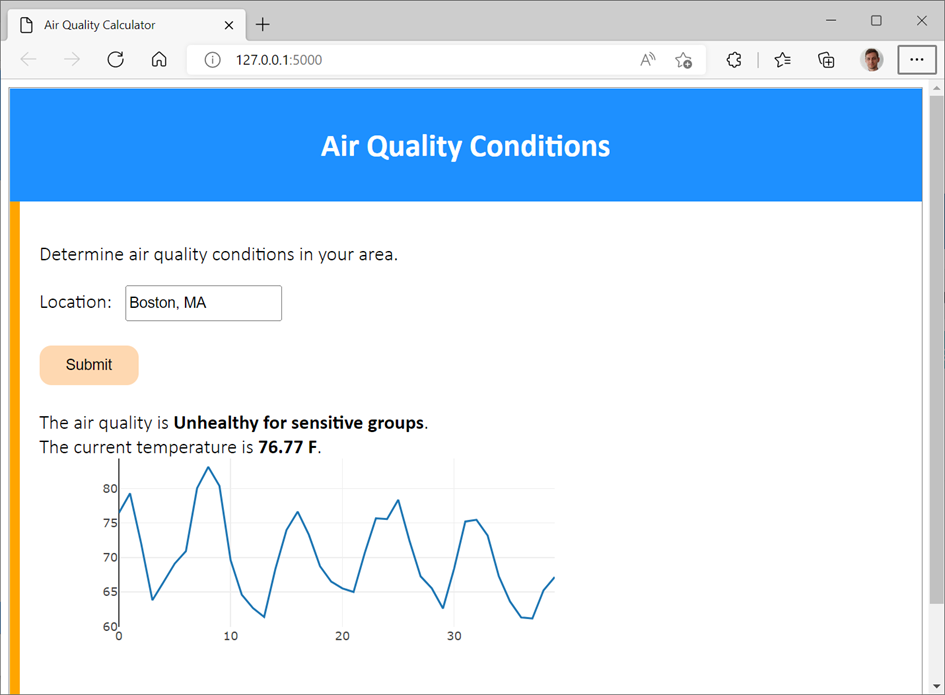


We will work in steps to:

   1.  Call Heather's python code to retrieve the weather data
   1.  Integrate a MATLAB model predicting the air quality
   1.  Deploy the resulting application made out of MATLAB + Python


In this example we will be using data from a web service at [<u>openweathermap.org</u>](https://openweathermap.org/)


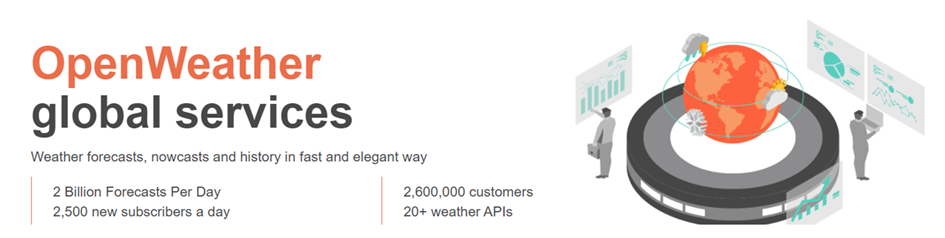


In order to access this live data, you will need to [register](https://home.openweathermap.org/users/sign_up) to the free tier offering. You will then have the option to generate an API key: [<u>https://home.openweathermap.org/api_keys</u>](https://home.openweathermap.org/api_keys)


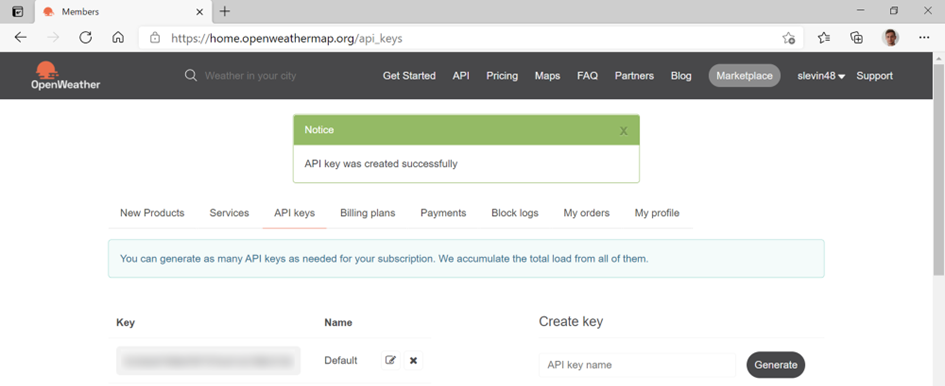


This key will be necessary for each call of the web service. For instance, requesting the [current weather](https://openweathermap.org/current) will be performed by calling the following address:


`api.openweathermap.org/data/2.5/weather?q={city name}&appid=`[`<u>{API key}</u>`](https://home.openweathermap.org/api_keys)


Save your API key in a text file called <u>accessKey.txt</u>.


In [ ]:
% apikey = fileread("accessKey.txt");


Alternatively you can use the sample API key (as demonstrated in this script)


In [7]:
appid ='b1b15e88fa797225412429c1c50c122a1';

# 2.1. Call Python from MATLAB

Heather has created a module called [<u>weather.py</u>](https://github.com/hgorr/weather-matlab-python/blob/main/weather.py) that reads from the web service and parses the JSON data it returns. Of course, we can do this in MATLAB, but let’s use this module as an example of accessing data from Python.

## 2.1.1. Check the Python installation

First connect to the Python environment using the [<u>pyenv</u>](https://www.mathworks.com/help/matlab/ref/pyenv.html) command. For more details on how to set-up MATLAB and Python, look at the next chapter. MATLAB can call python functions and create python objects from base Python, from packages you've installed and from your own Python code.


In [8]:
pyenv % Use pyversion for MATLAB versions before R2019b

ans = 
   <a href="matlab:helpPopup matlab.pyclient.PythonEnvironment" style="font-weight:bold">PythonEnvironment</a> with properties:

          Version: "3.10"
       Executable: "/opt/conda/bin/python"
          Library: "/opt/conda/lib/libpython3.10.so"
             Home: "/opt/conda"
           Status: NotLoaded
    ExecutionMode: InProcess

## 2.1.2. Call Python user-defined functions from MATLAB

Now let's see how to use my colleague's weather module. We will start by getting the data for today. The [<u>get_current_weather</u>](https://github.com/hgorr/weather-matlab-python/blob/c8985b96b4c4a64b283573a5276d25f33f311bcc/weather.py#L16) function in the weather module gets the current weather conditions in Json format. The [<u>parse_current_json</u>](https://github.com/hgorr/weather-matlab-python/blob/c8985b96b4c4a64b283573a5276d25f33f311bcc/weather.py#L42) function then returns that data as a python dictionary.


In [9]:
jsonData = py.weather.get_current_weather("London","UK",appid,api='samples')

jsonData = 
   Python <a href="matlab:helpPopup py.dict" style="font-weight:bold">dict</a> with no properties.

    {'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 280.32, 'pressure': 1012, 'humidity': 81, 'temp_min': 279.15, 'temp_max': 281.15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1485789600, 'sys': {'type': 1, 'id': 5091, 'message': 0.0103, 'country': 'GB', 'sunrise': 1485762037, 'sunset': 1485794875}, 'id': 2643743, 'name': 'London', 'cod': 200}

In [10]:
weatherData = py.weather.parse_current_json(jsonData)

weatherData = 
   Python <a href="matlab:helpPopup py.dict" style="font-weight:bold">dict</a> with no properties.

    {'temp': 280.32, 'pressure': 1012, 'humidity': 81, 'temp_min': 279.15, 'temp_max': 281.15, 'speed': 4.1, 'deg': 80, 'lon': -0.13, 'lat': 51.51, 'city': 'London', 'current_time': '2023-03-15 21:08:37.276105'}

## 2.1.3. Convert Python data to MATLAB data

Let’s convert the [Python dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) into a [MATLAB structure](https://www.mathworks.com/help/matlab/ref/struct.html):


In [11]:
data = struct(weatherData)

data = struct with fields:
   temp: 280.3200
        pressure: [1x1 py.int]
        humidity: [1x1 py.int]
        temp_min: 279.1500
        temp_max: 281.1500
           speed: 4.1000
             deg: [1x1 py.int]
             lon: -0.1300
             lat: 51.5100
            city: [1x6 py.str]
    current_time: [1x26 py.str]


Most of the data gets automatically converted. Only some fields did not find an obvious equivalent:

   -  `pressure` & `humidity` remain as a `py.int` object in MATLAB.
   -  `city` and `current_time` remain as a `py.str` object in MATLAB.


We can convert them explicitly using standard MATLAB functions like [double](https://www.mathworks.com/help/matlab/ref/double.html), [string](https://www.mathworks.com/help/matlab/characters-and-strings.html) and [datetime](https://www.mathworks.com/help/matlab/date-and-time-operations.html?s_tid=CRUX_lftnav):


In [12]:
data.pressure = double(data.pressure);
data.humidity = double(data.humidity);
data.deg = double(data.deg);
data.city = string(data.city);
data.current_time = datetime(string(data.current_time))

data = struct with fields:
   temp: 280.3200
        pressure: 1012
        humidity: 81
        temp_min: 279.1500
        temp_max: 281.1500
           speed: 4.1000
             deg: 80
             lon: -0.1300
             lat: 51.5100
            city: "London"
    current_time: 15-Mar-2023 21:08:37

## 2.1.4. Convert Python lists to MATLAB matrices

Now let's call the [<u>get_forecast</u>](https://github.com/hgorr/weather-matlab-python/blob/c8985b96b4c4a64b283573a5276d25f33f311bcc/weather.py#L67) function which returns a series of predicted weather conditions over the next few days. We can see that the fields of the structure are returned as [Python list](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists):


In [13]:
jsonData = py.weather.get_forecast('Muenchen','DE',appid,api='samples');
forecastData = py.weather.parse_forecast_json(jsonData);
forecast = struct(forecastData)

forecast = struct with fields:
   current_time: [1x36 py.list]
            temp: [1x36 py.list]
             deg: [1x36 py.list]
           speed: [1x36 py.list]
        humidity: [1x36 py.list]
        pressure: [1x36 py.list]


Lists containing only numeric data can be converted into doubles (since MATLAB R2022a):


In [14]:
forecast.temp = double(forecast.temp) - 273.15; % from Kelvin to Celsius
forecast.temp

ans = 1x36 double
   13.5200   12.5100    3.9000   -0.3700    0.1910    2.4180    3.3280    3.5200    5.1030    3.3050    2.4890    2.3090    1.8850    1.8150    1.4120    2.4980    4.7770    5.2170    0.6470   -1.9110   -3.5970   -4.9520   -5.8550   -0.1940    4.2720    4.8340   -0.6910   -3.6770   -4.3570   -5.0440
...


Lists containing text can be transformed to strings, and further processed into specific data types like datetime:


In [15]:
forecast.current_time = string(forecast.current_time);
forecast.current_time = datetime(forecast.current_time);
forecast.current_time

ans = 1x36 datetime array
   16-Feb-2017 12:00:00   16-Feb-2017 15:00:00   16-Feb-2017 18:00:00   16-Feb-2017 21:00:00   17-Feb-2017 00:00:00   17-Feb-2017 03:00:00   17-Feb-2017 06:00:00   17-Feb-2017 09:00:00   17-Feb-2017 12:00:00   17-Feb-2017 15:00:00   17-Feb-2017 18:00:00   17-Feb-2017 21:00:00   18-Feb-2017 00:00:00   18-Feb-2017 03:00:00   18-Feb-2017 06:00:00   18-Feb-2017 09:00:00   18-Feb-2017 12:00:00   18-Feb-2017 15:00:00   18-Feb-2017 18:00:00   18-Feb-2017 21:00:00   19-Feb-2017 00:00:00   19-Feb-2017 03:00:00   19-Feb-2017 06:00:00   19-Feb-2017 09:00:00   19-Feb-2017 12:00:00   19-Feb-2017 15:00:00   19-Feb-2017 18:00:00   19-Feb-2017 21:00:00   20-Feb-2017 00:00:00   20-Feb-2017 03:00:00   20-Feb-2017 06:00:00   20-Feb-2017 09:00:00   20-Feb-2017 12:00:00   20-Feb-2017 15:00:00   20-Feb-2017 18:00:00   20-Feb-2017 21:00:00


Read more about mapping data between Python and MATLAB (section 4.7)

## 2.1.5. Explore graphically the Python data imported in MATLAB

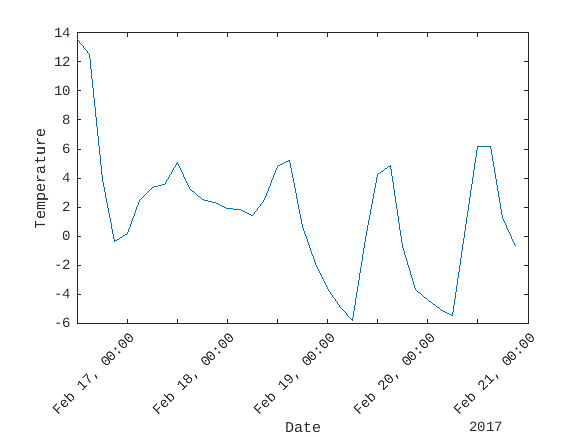

In [16]:
plot(forecast.current_time,forecast.temp)
xtickangle(45)
xlabel('Date')
ylabel('Temperature')

## 2.2.6. Call a Machine Learning model in MATLAB

Now let's suppose we have used some historical data to create a machine learning model that takes a set of weather conditions and returns a prediction of the air quality.  My Python colleague wants to make use of my model in her Python code.


First, let's see how the air quality prediction works.  There are three steps:

   -  Load the model from a .mat file
   -  Convert the current weather data from openweathermap.org to the format expected by the model
   -  Call the predict method of the model to get the expected air quality for that day


In [ ]:
load airQualModel.mat model
testData = prepData(data);
airQuality = predict(model,testData)


To give this to my colleague, I'm going to pack up these steps into a single function called [<u>predictAirQuality</u>](https://github.com/hgorr/weather-matlab-python/blob/main/predictAirQual.m):


In [14]:
function airQual = predictAirQual(data)
% PREDICTAIRQUAL Predict air quality, based on machine learning model
%
%#function CompactClassificationEnsemble
% Convert data types
currentData = prepData(data);
% Load model
mdl = load("airQualModel.mat");
model = mdl.model;
% Determine air quality
airQual = predict(model,currentData);
% Convert data type for use in Python
airQual = char(airQual);
end





This function does the same three steps as above – loads the model, converts the data, and calls the model's predict method.


However, it has to do one other thing.  The model returns a MATLAB categorical value which doesn't have a direct equivalent in Python, so we convert it to a character array.


Now that we have our MATLAB function that uses the air quality prediction model, let's see how to use it in Python.

